In [44]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# URL do arquivo CSV bruto no GitHub
url = "https://raw.githubusercontent.com/ViniciusHolanda001/datasets/refs/heads/main/synthetic_coffee_health_10000.csv"



In [45]:
# Carregar CSV
df = pd.read_csv(url)

print("Dimensão do dataset:", df.shape)
df.head()

Dimensão do dataset: (10000, 16)


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [46]:
# Informações do dataset
df.info()

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(df.isna().sum())

# Remover duplicatas
df = df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [47]:
# Preencher valores numéricos ausentes com a mediana
for col in df.select_dtypes(include=["int64","float64"]).columns:
    df[col] = df[col].fillna(df[col].median())

# Preencher valores categóricos ausentes com o valor mais comum
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nDepois da limpeza:")
print(df.isna().sum())


Depois da limpeza:
ID                         0
Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Health_Issues              0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64


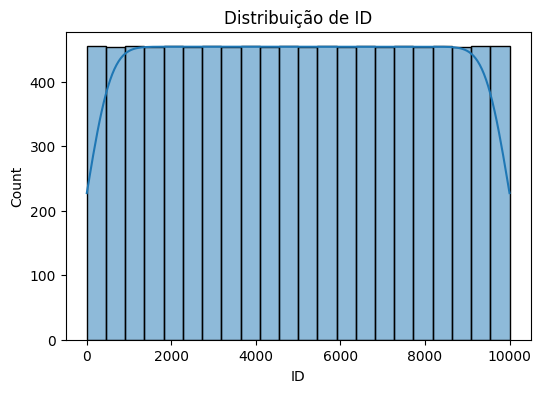

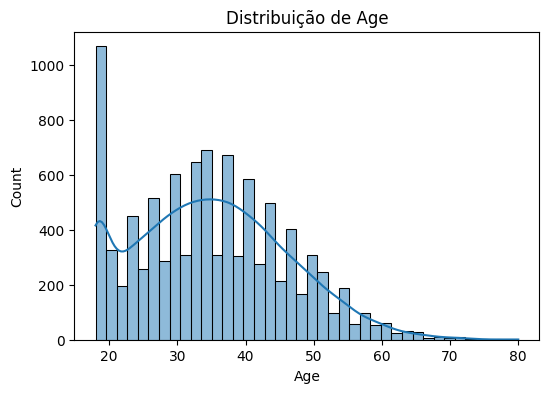

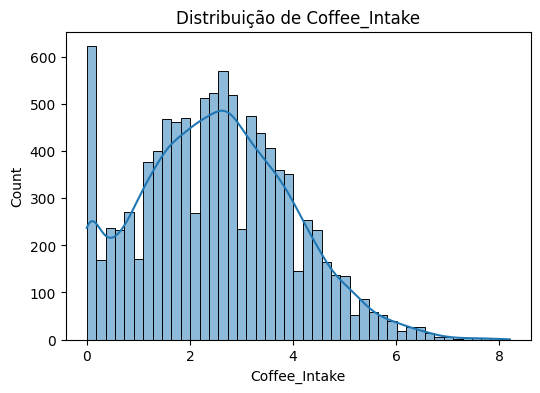

In [48]:
# Estatísticas descritivas
df.describe()

# Histograma de algumas variáveis numéricas
for col in df.select_dtypes(include=["int64","float64"]).columns[:3]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribuição de {col}")
    plt.show()

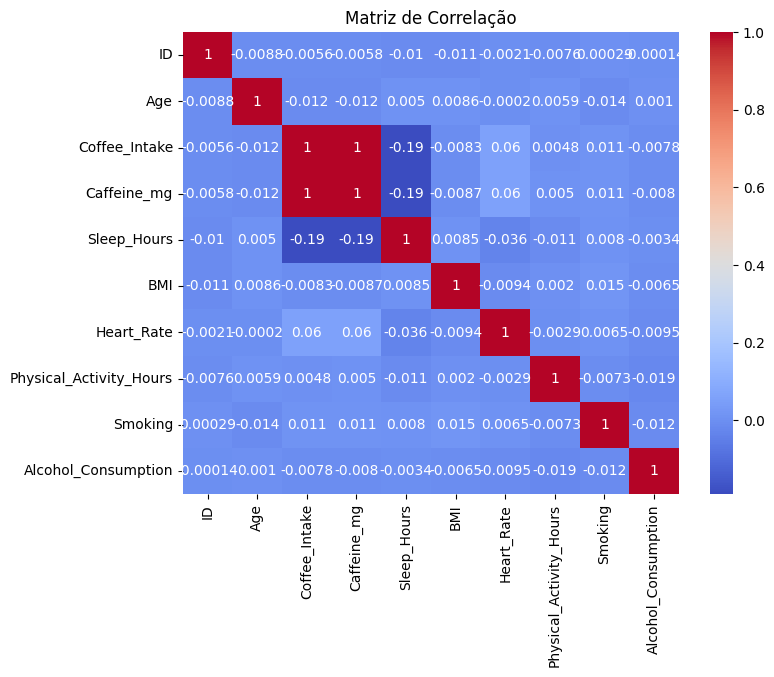

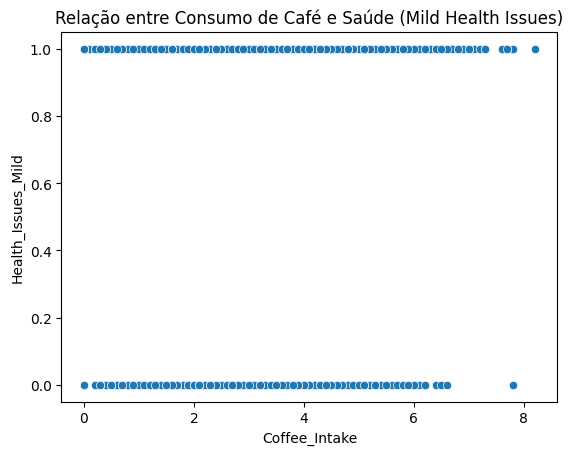

In [51]:
# Matriz de correlação
plt.figure(figsize=(8,6))
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# Gráfico de dispersão entre duas variáveis de interesse
# Convert 'Health_Issues' to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Health_Issues'], prefix='Health_Issues')
sns.scatterplot(x="Coffee_Intake", y="Health_Issues_Mild", data=df_encoded) # Assuming 'Mild' is one of the Health_Issues categories
plt.title("Relação entre Consumo de Café e Saúde (Mild Health Issues)")
plt.show()

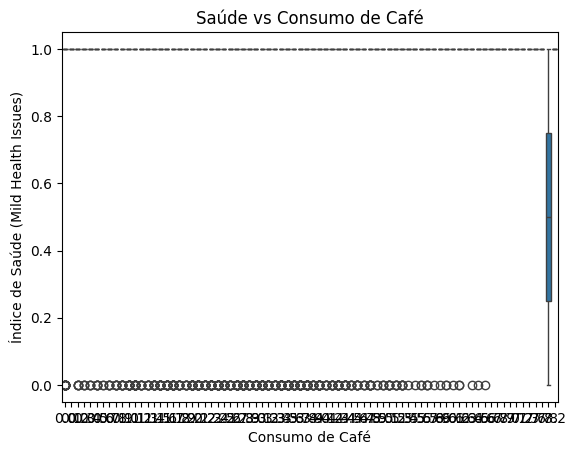

In [54]:
# Boxplot comparando saúde por faixas de consumo de café
# Convert 'Health_Issues' to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Health_Issues'], prefix='Health_Issues')
sns.boxplot(x="Coffee_Intake", y="Health_Issues_Mild", data=df_encoded) # Assuming 'Mild' is one of the Health_Issues categories
plt.title("Saúde vs Consumo de Café")
plt.xlabel("Consumo de Café")
plt.ylabel("Índice de Saúde (Mild Health Issues)")
plt.show()

In [53]:
# Exemplo de conclusão simples
print("Conclusões:")
print("- O dataset foi limpo (valores ausentes tratados e duplicatas removidas).")
print("- A análise univariada mostrou distribuições variadas entre as variáveis.")
print("- A matriz de correlação indicou relações relevantes entre consumo de café e saúde.")
print("- O scatterplot sugere que o aumento no consumo de café pode estar associado a mudanças no índice de saúde.")
print("- Próximo passo: investigar causalidade com análises mais profundas.")

Conclusões:
- O dataset foi limpo (valores ausentes tratados e duplicatas removidas).
- A análise univariada mostrou distribuições variadas entre as variáveis.
- A matriz de correlação indicou relações relevantes entre consumo de café e saúde.
- O scatterplot sugere que o aumento no consumo de café pode estar associado a mudanças no índice de saúde.
- Próximo passo: investigar causalidade com análises mais profundas.
